# Model Deployment

Now that we have built our model, we are going to use this notebook for a mock-deployment. In coming weeks we will build a public web app and figure out the full thing, but the basic functionality will be the same. 

In this notebook we load up our preprocessing function and our trained vectorizer and model, then query the twitter API for recent tweets about a given topic. Next, we pass these new tweets to our model for prediction and analyze the resulting sentiment breakdown graphically.

## Imports

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Loading model
import joblib

# For preprocessing function
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re

# For querying twitter API
import requests

# Vizzies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load Model & Vectorizer, Define Variables for Functions

In [3]:
# Import model
model = joblib.load("final_model.pkl")

# Import vectorizer
vectorizer = joblib.load("vectorizer.pkl")

# Define tokenizer for preprocessing
tokenizer = RegexpTokenizer(r"[a-zA-Z]+(?:'[a-z]+)?")

# Define stopwords list for preprocessing
stopwords_list = stopwords.words('english')

# Define bearer token for Twitter API authentication
bearer_token = 'AAAAAAAAAAAAAAAAAAAAABYsrAEAAAAAvxcLhwG%2Fdf3Kc2TUwuAKsTMsykc%3DxmfUn4movLwukCRlbWafezA6xDDftHjaAcfWCtG5B4TUyAV2he'

## Define Functions

In [4]:
def preprocess_tweet(tweet, tokenizer, stopwords_list):
    # Remove @mentions from tweet
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Clean hashtags by removing the hash symbol and separating words by capital letters
    tweet = re.sub(r'#(\w+)', lambda x: ' '.join(re.findall(r'[A-Z]?[a-z]+', x.group(1))), tweet)
    
    # Remove URL's
    tweet = re.sub(r'https?://\S+|www\.\S+', '', tweet)
    
    # Standardize case (lowercase the text)
    tweet = tweet.lower()
    
    # Tokenize text using RegEx
    tokens = tokenizer.tokenize(tweet)
    
    # Remove stopwords
    filtered_tokens = [word for word in tokens if word not in stopwords_list]
    
    # Return the preprocessed text
    return (" ".join(filtered_tokens))

In [5]:
def get_recent_tweets(query, bearer_token):
    url = "https://api.twitter.com/2/tweets/search/recent"
    
    # Filters to exclude retweets, replies, and tweets with links
    params = {
        'query': f'{query} -is:retweet -is:reply -has:links lang:en',
        'max_results': '100', # Can be adjusted, 100 is the max per request with my Basic API subscription plan
    }
    headers = {
        'Authorization': f'Bearer {bearer_token}',
        'Content-Type': 'application/json',
    }
    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        raise Exception(f"Request returned an error: {response.status_code} {response.text}")
    
    return pd.DataFrame(response.json().get('data', []))

In [6]:
def get_tweet_sentiments(topic):
    
    # Hit API for tweets about topic and put into dataframe
    topic_df = get_recent_tweets(topic, bearer_token)
    
    # Run preprocessing function over tweets
    topic_df['tweet'] = topic_df.text.apply(lambda x: preprocess_tweet(x, tokenizer, stopwords_list))
    
    # Define processed tweets as X and vectorize
    topic_X = topic_df.tweet
    topic_X_vectorized = vectorizer.transform(topic_X)
    
    # Generate sentiment predictions with model
    topic_sentiment = model.predict(topic_X_vectorized)
    
    # Return predictions in an array
    return topic_sentiment

In [56]:
def chart_sentiments(array, name):
    # Count occurrences of each sentiment
    sentiment, counts = np.unique(array, return_counts=True)
    
    # Define labels and colors
    labels = ['Negative', 'Positive']
    colors=['#65fffb', '#ff4dd2']
    
    # Create chart
    plt.pie(counts, autopct='%1.1f%%', colors=colors)
    
    # Create legend and adjust to make room
    plt.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.1))
    
    # Save figure with transparent background and show
    plt.savefig(f'../images/{name}_chart', transparent=True)
    plt.show();

## Giver a Whirl

### Yonce

In [8]:
beyonce_sentiment = get_tweet_sentiments('Beyonce')

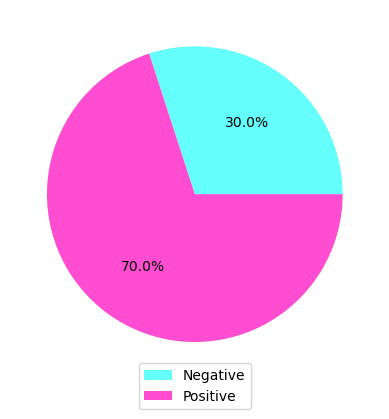

In [57]:
chart_sentiments(beyonce_sentiment, 'beyonce')

### Ri Ri

In [65]:
rihanna_sentiment = get_tweet_sentiments('Rihanna')

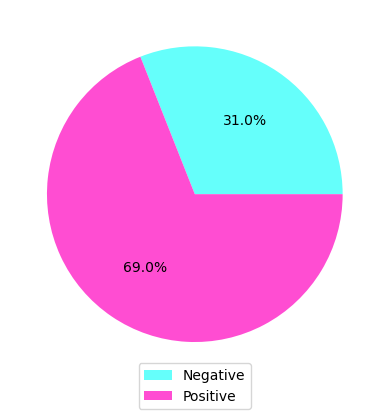

In [66]:
chart_sentiments(rihanna_sentiment, 'rihanna')

### Joe Byron

In [26]:
biden_sentiment = get_tweet_sentiments('Biden')

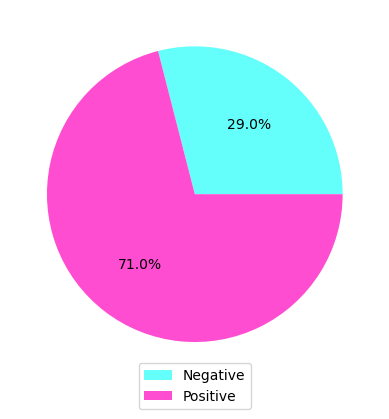

In [59]:
chart_sentiments(biden_sentiment, 'biden')

### Orange Man

In [28]:
trump_sentiment = get_tweet_sentiments('Trump')

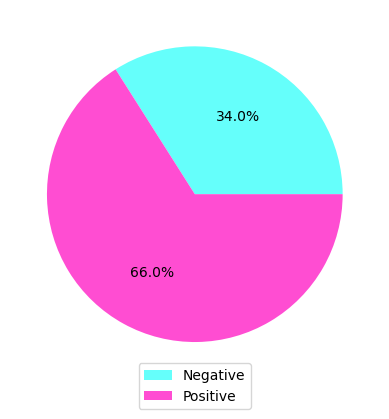

In [60]:
chart_sentiments(trump_sentiment, 'trump')

### Jaffrey Benzos

In [30]:
bezos_sentiment = get_tweet_sentiments('Jeff Bezos')

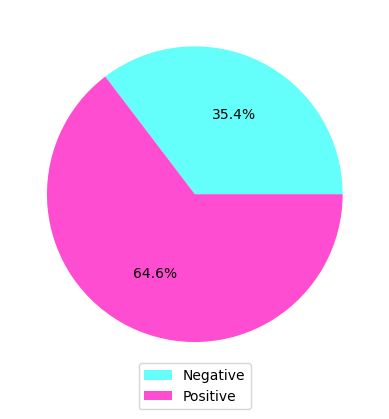

In [61]:
chart_sentiments(bezos_sentiment, 'bezos')

### Amazon

In [32]:
amazon_sentiment = get_tweet_sentiments('Amazon')

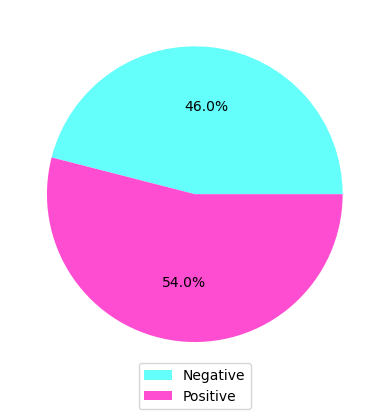

In [62]:
chart_sentiments(amazon_sentiment, 'amazon')

### Papa Zuck

In [34]:
zuckerberg_sentiment = get_tweet_sentiments('Mark Zuckerberg')

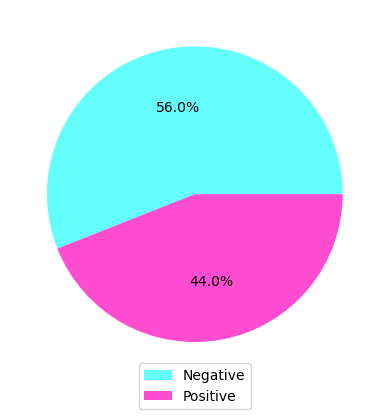

In [63]:
chart_sentiments(zuckerberg_sentiment, 'zuckerberg')

### The Facebook

In [36]:
facebook_sentiment = get_tweet_sentiments('Facebook')

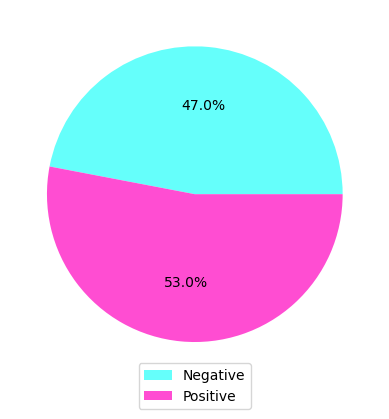

In [64]:
chart_sentiments(facebook_sentiment, 'facebook')

### elongated muskrat

In [67]:
elon_sentiment = get_tweet_sentiments('Elon Musk')

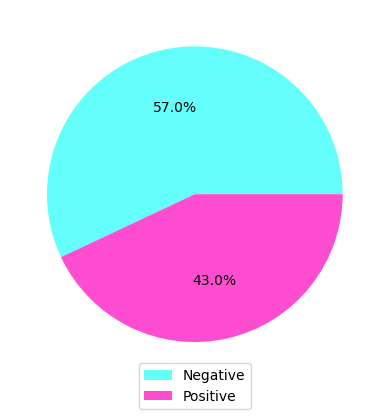

In [68]:
chart_sentiments(elon_sentiment, 'elon')

### Tweeter

In [69]:
twitter_sentiment = get_tweet_sentiments('Twitter')

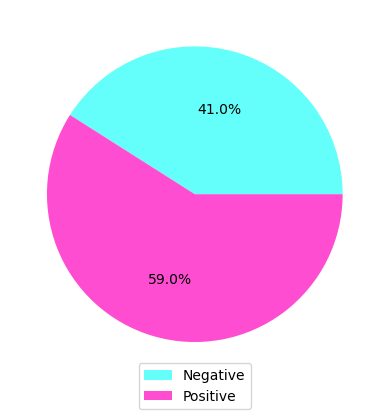

In [70]:
chart_sentiments(twitter_sentiment, 'twitter')

### [Insert Crowd-Pleasing Search Term]

In [72]:
x_sentiment = get_tweet_sentiments('AJR')

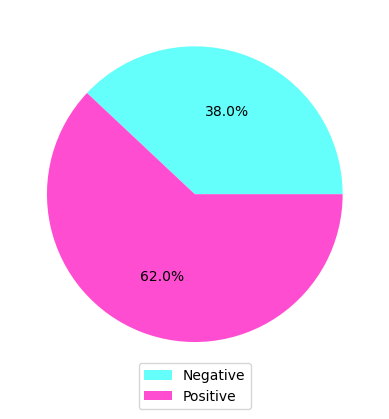

In [73]:
chart_sentiments(x_sentiment, 'x')